<h1><center>Exploratory Data Analysis</center></h1>
Helps us in unlocking the information and insights from raw data to answer our questions

<br><hr id="main">

### In this module...

In this module, we'll go through the essential exploratory analysis steps:
1. [Data Acquistion](#data)
2. [Basic information](#basic)
3. [Visualization](#visual)
4. [Segmentations](#segmentations)
5. [Correlations](#correlations)


### Preprocessing

 [Preprocessing](#preprocess)
 
### Feature Engineering

1. [Loading Cleaned Dataset](#load_clean)
2. [Sparse Classes](#feat_eng)
3. [Dummy Variables/ One- hot encoding](#dummy)


### Model Fitting

First, we'll load our analytical base table created above. 

Then, we'll go through the essential modeling steps:

1. [Split your dataset](#split)
2. [Build model pipelines](#pipelines)
3. [Declare hyperparameters to tune](#hyperparameters)
4. [Fit and tune models with cross-validation](#fit-tune)
5. [Evaluate metrics and select winner](#evaluate)

Finally, we'll save the best model as a project deliverable!

<br><hr>

In [1]:
import numpy as np
# numpy uses arrays for its inputs and outputs. It can be extended to objects for matrices.

import pandas as pd
# pandas offer Data structure and tools for effective data manipulation and analysis.

#Visualization libraries
import matplotlib.pyplot as plt
# plots and customizable graphs, one of the most popular one for visualization

import seaborn as sns
# For better visualization of our plots (heatmaps, time series, violin plots)

### Data Acquistion 

<br id="data">
# 1. Reading Data


- Its a process of loading  and reading data into the notebook from various sources, 2 important properties to deal with is the format of the dataset (.csv, .json, .xlsx, .hdf) and file path for locating the dataset.

In [2]:
df = pd.read_csv("Blore_Data.csv")

- df is Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes.
- <code style="color:steelblue">df.head()</code>: first 5 rows of the dataset. We can specify n, df.head(n) for first n rows.
- <code style="color:steelblue">df.tail()</code>: last 5 rows of the dataset. We can specify n, df.tail(n) for last n rows.
- Saving it in another csv file -> <code style="color:steelblue">df.to_csv(path)</code> i.e. Exporting your pandas Dataframe to a new csv file in the location specified by the variable path.


In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


### Basic Information

<br id="basic">
# 2. Basic information

- Trying to figure out the basic information we can acquire related to our dataset
- Potential info and type mismatch (Pandas automatically assign types based on the encoding it detects from the original data table.

In [4]:
df.shape

(13320, 9)

- The given dataset contains 13320 rows and 9 features/ columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


#### Null Value Imputation

As we can see we have a lot of null values so we need to impute them as much as possible to clean our data.

Loaction has 1 null value. Lets see the value.

In [6]:
df[df.location.isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


Only location is missing for this particular entry. Lets try to see if we can get the location with help of the society variable

In [7]:
df[df.society == 'Grare S']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


As we can see that we just have 2 entries with the society name "Grare S". Out of one we have location as Anantapura for 1 of the entry hence we can impute the location at index 568 as "Anantapura".

Similarly, imputations will be done for the rest of the features at pre processing stage.

In [8]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

- We have 6 features as Object and rest 3 as float.
- We can check the type of data in <code style="color:steelblue">df.head()</code> and verify the type mismatch.
- We might get a doubt that why total_sqft is interpreted as Object. Lets check the values in total_sqft

In [9]:
df.total_sqft.value_counts()

1200       843
1100       221
1500       205
2400       196
600        180
          ... 
3855         1
1525.84      1
2401         1
3554         1
2110         1
Name: total_sqft, Length: 2117, dtype: int64

- We can observe we have some values depicting as range of sqft i.e "1133 - 1384" and so treated total_sqft as an object.
- <code style="color: steelblue">.unique() </code> provide us all the unique values of that particular feature.
- We can use regex df.total_sqft.str.extract(r'(\d{4} - \d{4})').value_counts() or df.total_sqft.str.extract(r'(\d{3} - \d{3})').value_counts() or df.total_sqft.str.extract(r'(\d{4}.\d{2} - \d{4}.\d{2})').value_counts()

-  We can impute the average of each range of 120 rows and change the type of the feature total_sqft as float64.
- But we even have  the range '381 - 535' i.e. with 3 digits.
- We even have float type range/ interval '2249.81 - 4112.19'.
- We even have some values with the units of the data like Sq. Yards, Perch, Sq. Meter, Acres.
- We can assume the standard unit of measurement as sq ft as the feature name itself suggest total_sqft.
- 1 sq yard = 9 sq ft
- 1 sq meter = 10.7639 sq ft
- 1 Acre = 43560 sq ft
- 1 Perch = 272.25 sq ft
- 1 Cent = 435.56 sq ft
- 1 Ground = 2400.35 sq ft
- 1 Guntha = 1089 sq ft

In [10]:
df.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


- <code style="color:steelblue">df.describe()</code> returns a statistical summary.
- As we can observe categorical variable has summary of the count, unique and top whereas numerical data has statistical summary as well like mean, median, std etc.
- The area_type has 4 unique values, we will see the unique ones later.

In [11]:
df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

### Visualization

<br id="visual">
# 3. Visualization

- We can even view by making a barplot.

<AxesSubplot:xlabel='count', ylabel='area_type'>

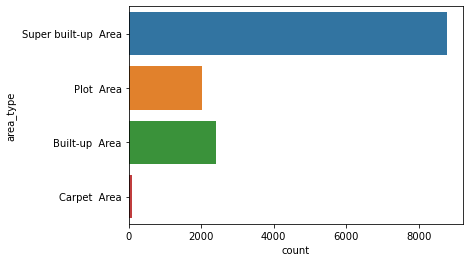

In [12]:
sns.countplot(y = 'area_type', data = df)

For a litle domain knowledge, below image clearly tells the difference in the area type
- Plot area: 
- Carpet Area
- Built up Area
- Super Built up Area

You should know that carpet area is 70 per cent of built-up area. For instance, assuming that the built-up area is 1,000 sq ft, your carpet area should be 70 per cent off 1,000 sq ft, which is, in this case, is 700 sq ft. So your carpet area is 700 sq ft

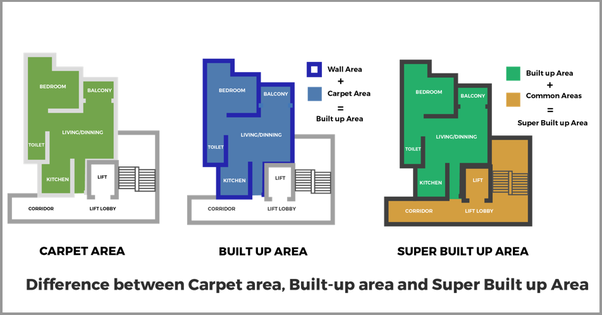

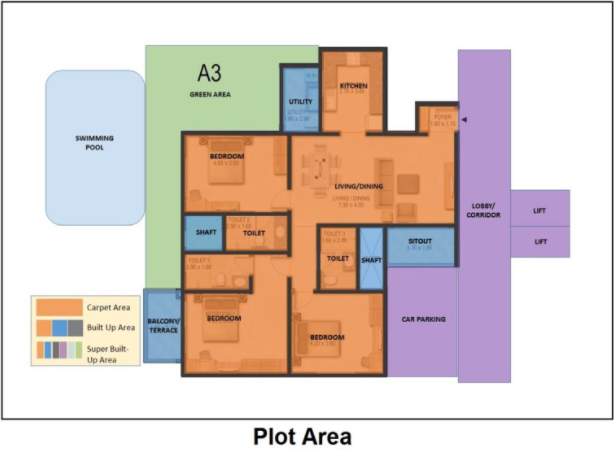

### Distributions

Lets see some distributions by plotting
* The [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html) is useful for learning more about the arguments to the <code style="color:steelblue">.hist()</code> function.
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">xrot=</code> argument rotates x-axis labels **counter-clockwise**.

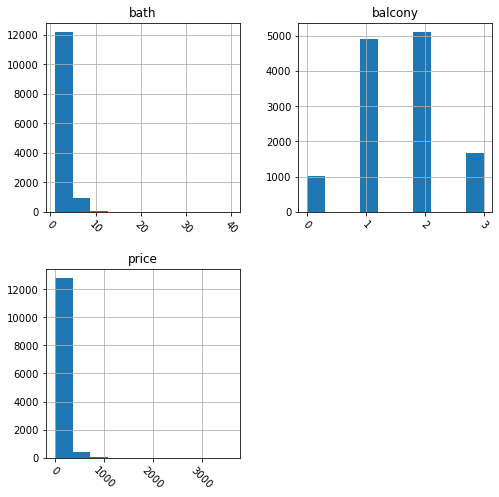

In [13]:
# Plot histogram grid
df.hist(figsize = (8,8),xrot = -45)

# Clear the text "residue"
plt.show()

In [14]:
df.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [15]:
df.balcony.unique()

array([ 1.,  3., nan,  2.,  0.])

As depicted by the histogram and can even see the <code style="color:steelblue">.value_counts()</code> or <code style="color:steelblue">.unique()</code>

In [16]:
df.bath.value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

**We can write a <code style="color:steelblue">for</code> loop to plot bar plots of each of the categorical features.**
* Write the loop to be able to handle any number of categorical features.
* Invoke <code style="color:steelblue">plt.show()</code> after each bar plot to display all plots in one output.

In [17]:
# Plot bar plot for each categorical feature
#for feature in df.dtypes[df.dtypes == 'object'].index:
#    sns.countplot(y = feature , data = df)
#    plt.show()

In [18]:
# Summarize categorical features
df.describe(include = ['object'])

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


- In the describe function, as we can see apart from area_type all other features have more number of unique value, hence we can't gain much insight looking at the plot.
- Above we have already plotted for area_type, we can even view the size plot as it has comparitively less unique values.

<AxesSubplot:xlabel='count', ylabel='size'>

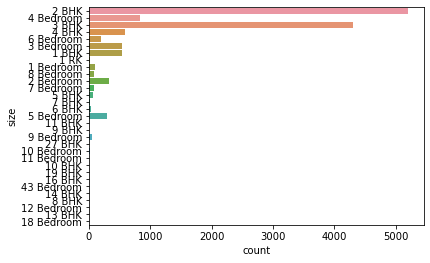

In [19]:
sns.countplot(y="size", data = df)

- Maximum houses are either 2 BHK or 3 BHK.
- We can compute the different values of sizes in many ways.
- As we have both BHK and bedroom so either we can add 2 in the sizes which are named as bedroom or subtract 2 from BHK and then make it as a numerical variable.
- Or can treat difference of BHk and Bedroom as Typo and remove them and make the variable as numerical variable.

### Segmentations

<br id="segmentations">
# 4. Segmentations

Next, let's create some segmentations. Segmentations are powerful ways to cut the data to observe the relationship between **categorical features** and **numeric features**.

### Seaborn's boxplot
One of the first segmentations you should try is segmenting the target variable by key categorical features.
<br>
Segment <code style="color:steelblue">'price'</code> by <code style="color:steelblue">'area_type'</code> and plot the resulting distributions

<AxesSubplot:xlabel='price', ylabel='area_type'>

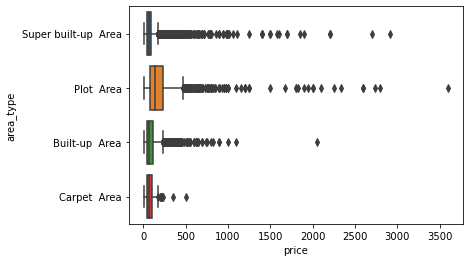

In [20]:
# Segment price by area_type and plot distributions
sns.boxplot(y = 'area_type', x = 'price', data = df)

In [21]:
# Sort df.lot_size and display the top 5 samples
#df[df.area_type == 'Super built-up  Area'].sort_values(by = "price",ascending=False).head()

### Seaborn's violinplot
However, we want to introduce you to a type of plot that serves the same purpose, but is much more informative: the violin plot.

- A box plot only shows summary statistics such as median and interquartile range.
- A violin plot shows the entire probability distribution of the data. (In case you're wondering, you don't need a statistics degree to interpret them.)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


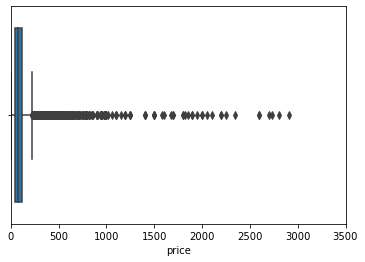

In [22]:
sns.boxplot(df.price)
plt.xlim(0, 3500) # setting x-axis range to be the same as in violin plot
plt.show()

In [23]:
df.price.sort_values().head(10)

10526     8.00
11569     8.44
8594      9.00
5410     10.00
4113     10.00
1471     10.00
11091    10.00
7482     10.00
12579    10.00
11945    10.25
Name: price, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


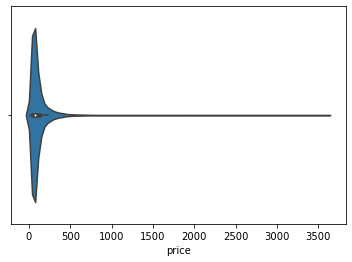

In [24]:
sns.violinplot(df.price)
plt.show()

Interpretation

In the violin plot, the thin horizontal bar represents the range (min to max) of the data.
The thick horizontal bar is the interquartile range (25th percentile to 75th percentile).
The white dot is the median.
Finally, the thickness of the "violin" represents the estimated probability density.
Based on the violin plot for 'price', it looks like we have possible outlier.

However, in addition to your target variable, it's also a good idea to check for outliers in other key features.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


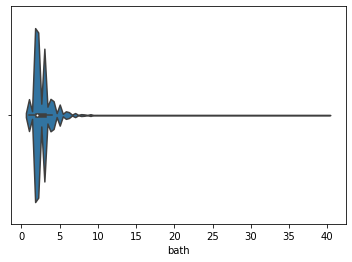

In [25]:
sns.violinplot(df.bath)
plt.show()

**We can display the standard deviations of each feature alongside their means after performing a groupby.**
* This will give you an idea of the variation within in feature, by class.

In [26]:
for feature in df.dtypes[df.dtypes == "object"].index:
    print(df.groupby(feature).agg([np.std , np.mean]))

                          bath             balcony                 price  \
                           std      mean       std      mean         std   
area_type                                                                  
Built-up  Area        1.250774  2.649378  0.883853  1.472727  109.270222   
Carpet  Area          1.170108  2.505747  0.979541  1.402439   73.446012   
Plot  Area            2.022681  3.893479  0.962821  1.392488  253.311895   
Super built-up  Area  0.970320  2.430386  0.749208  1.658100  113.971214   

                                  
                            mean  
area_type                         
Built-up  Area        104.285498  
Carpet  Area           89.502356  
Plot  Area            208.495486  
Super built-up  Area   92.971757  
                          bath             balcony                 price  \
                           std      mean       std      mean         std   
availability                                                          

### Correlations

<br id="correlations">
# 5. Correlations

To look at the relationships between **numeric features** and **other numeric features**.
<br>

Correlation is a value between -1 and 1 that represents how closely values for two separate features move in unison.


Practically, just know that:

- Positive correlation means that as one feature increases, the other increases.
- Negative correlation means that as one feature increases, the other decreases.
- Correlations near -1 or 1 indicate a strong relationship.
- Those closer to 0 indicate a weak relationship.
- 0 indicates no relationship.

In [27]:
correlations = df.corr()

In [28]:
correlations

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


We can see that bath and price are moderately correlated.

If we have more numerical features it becomes quite difficult to correlate the relation among the variable so we have seaborn's function <code style="color: steelblue">heatmap()</code>

<AxesSubplot:>

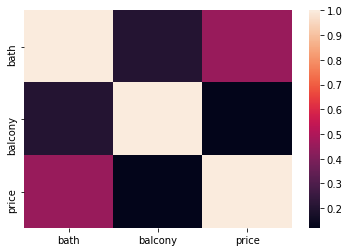

In [29]:
sns.heatmap(correlations)

<h1><center> Preprocessing </center></h1>

<br id="preprocess">
# Preprocessing

The first step to data cleaning is removing unwanted observations from your dataset.
This includes duplicate observations and irrelevant observations.

In [30]:
# Drop duplicates
df = df.drop_duplicates()
print( df.shape )

(12791, 9)


As our rows changes from 13320 to 12791 that is we found 529 duplicates rows in our datasets. So its always a best practice to check for duplicates.

### Null Value Imputation

#### Lets check for null values and try to impute them

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12791 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12790 non-null  object 
 3   size          12775 non-null  object 
 4   society       7463 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12718 non-null  float64
 7   balcony       12186 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 999.3+ KB


- Loaction variable has 1 null value.
- size variabe has 16 null values.
- society variable has 5382 null values.
- bath variable has 73 null values.
- balcony has 12186 null values

As discussed above lets impute the loaction value to "Anantapura" after checking the values once after droping the duplicates.

In [32]:
x = df[df.location.isnull()]
x

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [33]:
df[df.society == "Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


So we can impute the value of location at index 568 as Anantapura.

In [34]:
df["location"].fillna("Anantapura", inplace=True)

In [35]:
df.location.isnull().sum()

0

Hence, location had no null values.

In [36]:
df[df['size'].isnull()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


We can observe the pattern when we see the null values of size.
- The variables bath nd balcony are null as well for the same rows.
- The area_type is "Plot Area" for all the rows where size is null/ NaN.
- The availability is "Immediate Possession" for all the rows.

Lets check whether we have more values of area_type == "Plot Area" and availability == "Immediate Possession"

In [37]:
df[df.area_type == 'Plot  Area']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.0
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.0
14,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Skityer,2250,3.0,2.0,148.0
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800,5.0,2.0,380.0
...,...,...,...,...,...,...,...,...,...
13281,Plot Area,Ready To Move,Margondanahalli,5 Bedroom,NaN,1375,5.0,1.0,125.0
13291,Plot Area,18-Jan,Weavers Colony,1 Bedroom,NaN,812,1.0,0.0,26.0
13300,Plot Area,Ready To Move,Hosakerehalli,5 Bedroom,NaN,1500,6.0,2.0,145.0
13303,Plot Area,Ready To Move,Vidyaranyapura,5 Bedroom,NaN,774,5.0,3.0,70.0


In [38]:
df[df.availability == 'Immediate Possession']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
579,Plot Area,Immediate Possession,Sarjapur Road,NaN,Asiss B,1200 - 2400,NaN,NaN,34.185
1775,Plot Area,Immediate Possession,IVC Road,NaN,Orana N,2000 - 5634,NaN,NaN,124.000
2264,Plot Area,Immediate Possession,Banashankari,NaN,NaN,2400,NaN,NaN,460.000
2809,Plot Area,Immediate Possession,Sarjapur Road,NaN,AsdiaAr,1200 - 2400,NaN,NaN,28.785
2862,Plot Area,Immediate Possession,Devanahalli,NaN,Ajleyor,1500 - 2400,NaN,NaN,46.800
5333,Plot Area,Immediate Possession,Devanahalli,NaN,Emngs S,2100 - 5405,NaN,NaN,177.115
6423,Plot Area,Immediate Possession,Whitefield,NaN,SRniaGa,2324,NaN,NaN,26.730
6636,Plot Area,Immediate Possession,Jigani,NaN,S2enste,1500,NaN,NaN,25.490
6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545
7680,Plot Area,Immediate Possession,Kasavanhalli,NaN,NaN,5000,NaN,NaN,400.000


So Plot area area_type have more values apart from the ones where size is null.
But for availability as "Immediate Possession" we have exactly same rows as we have for size equal to null/ NaN.

So we can decide that since its just a plot area and immediate possession nothing is decided for that plot yet and hence we can impute **Size, bath and balcony as 0 for these specific 16 rows**

In [39]:
df1 = df.copy()

In [40]:
ip = df[df.availability == 'Immediate Possession']
ind = list(ip.index)
len(ind)

16

In [41]:
df1 = df1.drop(index=ind)

In [42]:
df1.shape

(12775, 9)

In [43]:
ip.fillna(0, inplace = True)
ip.reset_index(drop = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,Immediate Possession,Sarjapur Road,0,Asiss B,1200 - 2400,0.0,0.0,34.185
1,Plot Area,Immediate Possession,IVC Road,0,Orana N,2000 - 5634,0.0,0.0,124.000
2,Plot Area,Immediate Possession,Banashankari,0,0,2400,0.0,0.0,460.000
3,Plot Area,Immediate Possession,Sarjapur Road,0,AsdiaAr,1200 - 2400,0.0,0.0,28.785
4,Plot Area,Immediate Possession,Devanahalli,0,Ajleyor,1500 - 2400,0.0,0.0,46.800
5,Plot Area,Immediate Possession,Devanahalli,0,Emngs S,2100 - 5405,0.0,0.0,177.115
6,Plot Area,Immediate Possession,Whitefield,0,SRniaGa,2324,0.0,0.0,26.730
7,Plot Area,Immediate Possession,Jigani,0,S2enste,1500,0.0,0.0,25.490
8,Plot Area,Immediate Possession,Hoskote,0,SJowsn,800 - 2660,0.0,0.0,28.545
9,Plot Area,Immediate Possession,Kasavanhalli,0,0,5000,0.0,0.0,400.000


In [44]:
data = pd.concat([df1, ip], ignore_index=True)
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
12786,Plot Area,Immediate Possession,Carmelaram,0,Ocezes,2000,0.0,0.0,120.00
12787,Plot Area,Immediate Possession,Mysore Road,0,Naoden,1200 - 2400,0.0,0.0,42.30
12788,Plot Area,Immediate Possession,Rajankunte,0,0,1575,0.0,0.0,31.11
12789,Plot Area,Immediate Possession,Yelahanka,0,Saaveha,1200 - 1800,0.0,0.0,12.75


In [45]:
df1 = data.copy()

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12791 non-null  object 
 3   size          12791 non-null  object 
 4   society       7466 non-null   object 
 5   total_sqft    12791 non-null  object 
 6   bath          12734 non-null  float64
 7   balcony       12202 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(3), object(6)
memory usage: 899.5+ KB


Lets impute null values of society feature/ variable

In [47]:
df.society.isnull().sum()
# we have 5328 rows which have society as null.

5328

One way to impute the societies is through location that is, checking the socities in each location and then imputing the mode of those society wise and then imputing the values if mode value is 30% or greater.

In [48]:
# list of locations where the society is null.
li = list(df[df['society'].isnull()].location.unique())
len(li)

1110

In [49]:
for i in li:
    data = df[df.location == i]
    if int(data.society.isnull().sum()/len(data)*100) <= 50:
            a = df[df.location == i].reset_index(drop= True)
            b = list(a.society.value_counts()/len(a)*100)
            if(len(b) > 0):
                if(b[0] > 30):
                    z = a.society.value_counts().index[0]
                else:
                    z = "Missing"
    df1.loc[(df1['society'].isnull()) & (df1["location"]== i ), "society"] = z
  

In [50]:
# After imputing the society values with mode if its greater than 30%, we have imputed the rest of the values as "Missing"
df1[df1.society == 'Missing']

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Missing,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Missing,1200,2.0,1.0,51.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,Missing,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,Missing,1020,6.0,NaN,370.00
10,Super built-up Area,18-Feb,Whitefield,3 BHK,Missing,1800,2.0,2.0,70.00
...,...,...,...,...,...,...,...,...,...
12763,Carpet Area,Ready To Move,Hulimavu,1 BHK,Missing,500,1.0,3.0,220.00
12765,Built-up Area,Ready To Move,Billekahalli,3 BHK,Missing,1805,3.0,3.0,134.00
12768,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,Missing,1050,2.0,2.0,52.71
12769,Super built-up Area,Ready To Move,Bellandur,2 BHK,Missing,1262,2.0,2.0,47.00


In [51]:
df1.society.isnull().value_counts()

False    12791
Name: society, dtype: int64

Hence we have imputed the null values of society variable.

### total_sqft imputation
- We can take the standard unit of measurement as sq ft as the name suggest<code style="color: steelblue"> total_sqft </code>.
- 1 sq yard = 9 sq ft
- 1 sq meter = 10.7639 sq ft
- 1 Acre = 43560 sq ft
- 1 Perch = 272.25 sq ft
- 1 Cent = 435.56 sq ft
- 1 Ground = 2400.35 sq ft
- 1 Guntha = 1089 sq ft

In [52]:
def sql_converter(x):
    if x.find("Acres") != -1:
        x = x[:x.find("A")].strip()
        x = float(x)*43560
    elif x.find("Sq. Meter") != -1:
        x = x[:x.find("S")].strip()
        x = float(x)*10.76
    elif x.find("Sq. Yards") != -1:
        x = x[:x.find("S")].strip()
        x = float(x)*9
    elif x.find("Perch") != -1:
        x = x[:x.find("P")].strip()
        x = float(x)*272.25
    elif x.find("Cents") != -1:
        x = x[:x.find("C")].strip()
        x = float(x)*435.56
    elif x.find("Grounds") != -1:
        x = x[:x.find("G")].strip()
        x = float(x)*2400.35
    elif x.find("Guntha") != -1:
        x = x[:x.find("G")].strip()
        x = float(x)*1089
    elif x.find(" - ") != -1:
        a = x[:x.find(" -")].strip()
        b = x[x.find("-")+2:].strip()
        x = (float(a) + float(b))/2
        
    return float(x)

In [53]:
y = df1.total_sqft.apply(sql_converter)


In [54]:
df1["total_sqft"] = y

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12791 non-null  object 
 3   size          12791 non-null  object 
 4   society       12791 non-null  object 
 5   total_sqft    12791 non-null  float64
 6   bath          12734 non-null  float64
 7   balcony       12202 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(4), object(5)
memory usage: 899.5+ KB


Total_sqft variable is of type float64 (previously it was object) and now all the values are in single measurement unit that is sq ft.

#### Imputing Null values for bath and balcony

Null values for bath and balcony will be computed once we do imputation on size feature.

#### Size variable Imputation

In [56]:
df1["size"].value_counts()

2 BHK         4931
3 BHK         4120
4 Bedroom      824
4 BHK          574
3 Bedroom      535
1 BHK          521
2 Bedroom      314
5 Bedroom      291
6 Bedroom      191
1 Bedroom      104
8 Bedroom       84
7 Bedroom       82
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
0               16
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 Bedroom       2
10 BHK           2
11 BHK           2
12 Bedroom       1
43 Bedroom       1
27 BHK           1
14 BHK           1
16 BHK           1
13 BHK           1
18 Bedroom       1
19 BHK           1
Name: size, dtype: int64

In [57]:
df1["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom', 0], dtype=object)

The size has lot of variations.
- We can assume that BHK and bedroom are same and just typing human errors. or,
- To the BHK values we can add 2 to convert it to Bedrooms that is one standard unit to quantify.

In [58]:
df1["size"]=df1["size"].fillna(0)

In [59]:
def rooms_desc(x):
    x = str(x)
    if x.find("BHK") != -1:
        x = x[:x.find(" ")].strip()
        x = int(x)+2
    elif x.find("Bedroom") != -1:
        x = x[:x.find(" ")].strip()
        x = int(x)
    elif x.find("RK") != -1:
        x = x[:x.find(" ")].strip()
        x = int(x)+1
     
    return int(x)
        

In [60]:
z= df1["size"].apply(rooms_desc)

In [61]:
df1["size"] = z

In [62]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,4,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,5,Missing,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,5,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,4,Missing,1200.0,2.0,1.0,51.00


In [63]:
df1[["total_sqft","size"]].sort_values(by = "total_sqft", ascending = False).head(10)

,total_sqft,size
1084,1306800.00,2
647,1123031.25,9
7419,653400.00,3
6835,653340.00,8
11189,261360.00,3
1017,231303.60,1
6196,91040.40,2
7158,87120.00,1
7535,54885.60,1
10139,54450.00,2


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12791 non-null  object 
 3   size          12791 non-null  int64  
 4   society       12791 non-null  object 
 5   total_sqft    12791 non-null  float64
 6   bath          12734 non-null  float64
 7   balcony       12202 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 899.5+ KB


As we can see the size variable is changed from object type to int64.

In [65]:
df1.availability.value_counts()

Ready To Move    10172
18-May             292
18-Dec             284
18-Apr             269
18-Aug             187
                 ...  
14-Jul               1
15-Dec               1
16-Nov               1
14-Nov               1
16-Jan               1
Name: availability, Length: 81, dtype: int64

Lets try to impute the values of the availability feature.
As year is not mentioned so we can assume the data is of one particular year, so we can remove the dates and can combine the months together.

In [66]:
def avail_month(x):
    if x.find("-") != -1:
        x = x[x.find("-")+1 :].strip()
    return x

In [67]:
av = df1["availability"].apply(avail_month)
av.unique()

array(['Dec', 'Ready To Move', 'May', 'Feb', 'Nov', 'Oct', 'Sep', 'Mar',
       'Apr', 'Aug', 'Jun', 'Jan', 'Jul', 'Immediate Possession'],
      dtype=object)

In [68]:
df1["availability"] = av

In [69]:
df1.availability.unique()

array(['Dec', 'Ready To Move', 'May', 'Feb', 'Nov', 'Oct', 'Sep', 'Mar',
       'Apr', 'Aug', 'Jun', 'Jan', 'Jul', 'Immediate Possession'],
      dtype=object)

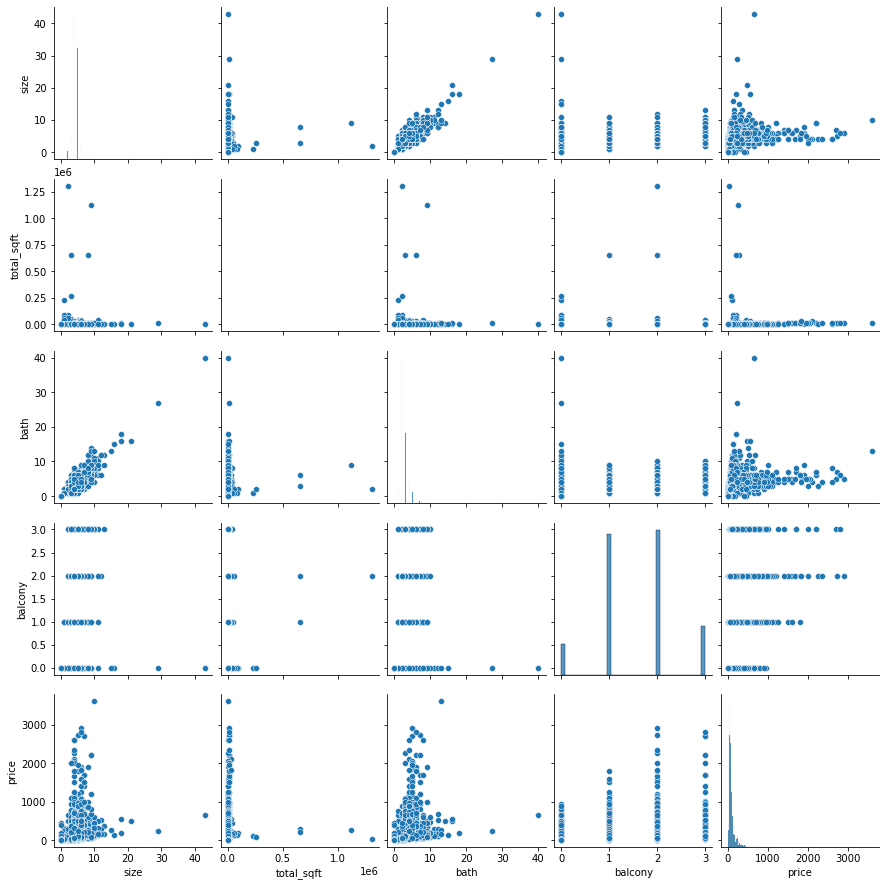

In [70]:
sns.pairplot(df1)

We can see linear relationship between bath and size variables.

<AxesSubplot:>

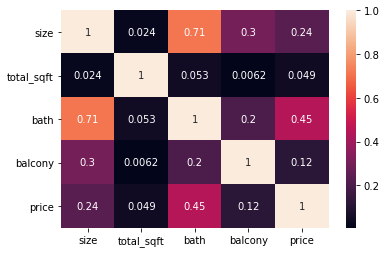

In [71]:
sns.heatmap(df1.corr(), annot= True)

size and bathroom are highly correlated

#### bathroom  & balcony needs to be computed based on the size

In [72]:
df1[df1.bath.isnull()].head(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
56,Built-up Area,Feb,Devanahalli,4,BrereAt,3210.0,NaN,NaN,192.000
81,Built-up Area,Oct,Hennur Road,4,Gollela,3203.5,NaN,NaN,224.500
224,Super built-up Area,Dec,Devanahalli,5,Jurdsig,1630.0,NaN,NaN,74.820
344,Super built-up Area,Dec,Kanakpura Road,3,PrarePa,525.0,NaN,NaN,21.530
668,Super built-up Area,Dec,JP Nagar,7,Pehtsa,5520.0,NaN,NaN,375.000
701,Super built-up Area,Dec,JP Nagar,7,Pehtsa,5600.0,NaN,NaN,548.500
800,Super built-up Area,Dec,JP Nagar,6,Pehtsa,4624.5,NaN,NaN,453.000
940,Super built-up Area,Ready To Move,Whitefield,4,PrOakSi,4348.5,NaN,NaN,304.000
1260,Built-up Area,May,Hennur,3,Asoilul,2264.0,NaN,NaN,155.000
1263,Super built-up Area,Jun,Yelahanka,5,Shalkri,1662.0,NaN,NaN,67.980


In [73]:
a = list(df1.location.unique())
#b = list(df.society.unique())

In [74]:
df1.bath.median()

2.0

In [75]:
df1["bath"].fillna(2.0, inplace=True)

In [76]:
df1.balcony.median()

2.0

In [77]:
df1["balcony"].fillna(2.0, inplace=True)

In [78]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12791 entries, 0 to 12790
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12791 non-null  object 
 1   availability  12791 non-null  object 
 2   location      12791 non-null  object 
 3   size          12791 non-null  int64  
 4   society       12791 non-null  object 
 5   total_sqft    12791 non-null  float64
 6   bath          12791 non-null  float64
 7   balcony       12791 non-null  float64
 8   price         12791 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 899.5+ KB


### Finally, let's save the cleaned dataframe.

Before we move forward, let's save the new dataframe we worked hard to clean.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* We set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [79]:
# Save cleaned dataframe to new file
df1.to_csv('cleaned_df.csv', index=None)

<h1><center> Feature Engineering </h1></center>

<br id="load_clean">
# Loading Cleaned Dataset

In [80]:
# Load cleaned dataset that we saved just above
df = pd.read_csv('cleaned_df.csv')

In [81]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Dec,Electronic City Phase II,4,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,5,Missing,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,5,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,4,Missing,1200.0,2.0,1.0,51.00


### Sparse Classes

<br id="feat_eng">
# Sparse Classes

Grouping sparse classes in our categorical features

<AxesSubplot:xlabel='count', ylabel='area_type'>

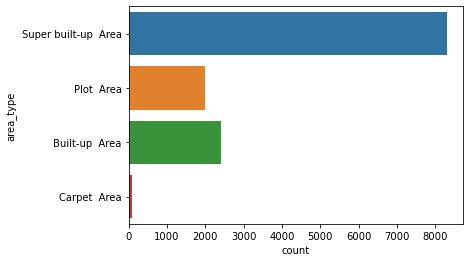

In [82]:
sns.countplot(y = "area_type", data = df)

In [83]:
df.area_type.value_counts()

Super built-up  Area    8317
Built-up  Area          2398
Plot  Area              1989
Carpet  Area              87
Name: area_type, dtype: int64

We can group "Carpet Area" as "Plot Area" as both have very minute difference and "Carpet area" is a sparse class type.

In [84]:
df.replace(to_replace = "Carpet  Area", value="Plot  Area", inplace=True)

<AxesSubplot:xlabel='count', ylabel='area_type'>

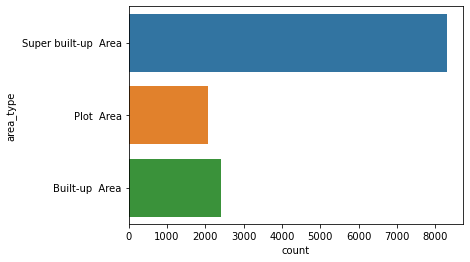

In [85]:
sns.countplot(y = "area_type", data = df)

<AxesSubplot:xlabel='count', ylabel='availability'>

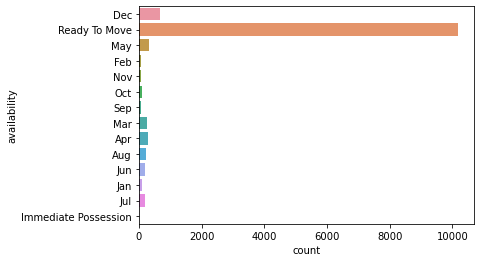

In [86]:
sns.countplot(y = "availability", data = df)

We have nothing much to comupute for availability as we have already assumed and imputed during pre-processing

Remaining categorical variable i.e location and society have more number of unique values and hence barplot won't help us in any means for the visualization.

### Encode Dummy Variables

<br id="dummy">
# Encode dummy variables

Python machine learning algorithms cannot handle categorical features directly.

In [87]:
df.dtypes

area_type        object
availability     object
location         object
size              int64
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [88]:
# Create new dataframe with dummy features
X_features = df.columns
categorical_var = ['area_type', 'availability', 'location', 'society']
new_hp = pd.get_dummies(df[X_features], columns = categorical_var, drop_first=True )

In [89]:
new_hp.head()

,size,total_sqft,bath,balcony,price,area_type_Plot Area,area_type_Super built-up Area,availability_Aug,availability_Dec,availability_Feb,...,society_Xeitaa,society_YCnce R,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
0,4,1056.0,2.0,1.0,39.07,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,4,2600.0,5.0,3.0,120.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1440.0,2.0,3.0,62.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,1521.0,3.0,1.0,95.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,1200.0,2.0,1.0,51.00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# Save analytical base table
new_hp.to_csv('cleaned_hp.csv', index=None)

<h1><center>Model Fitting</h1></center>

Load the saved analytical base table

In [91]:
df = pd.read_csv("cleaned_hp.csv")
df.shape

(12791, 4013)

In [92]:
# Import Elastic Net, Ridge Regression, and Lasso Regression
from sklearn.linear_model import ElasticNet, Ridge, Lasso

# Import Random Forest and Gradient Boosted Trees
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Split the dataset

<br id="split">
# 1. Split your dataset

First, let's import the <code style="color:steelblue">train_test_split()</code> function from Scikit-Learn.

In [93]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

Next, separate your dataframe into separate objects for the target variable (<code style="color:steelblue">y</code>) and the input features (<code style="color:steelblue">X</code>).

In [94]:
# Create separate object for target variable
y = df.price
# Create separate object for input features
X = df.drop('price' , axis = 1)

**First, split <code style="color:steelblue">X</code> and <code style="color:steelblue">y</code> into training and test sets using the <code style="color:steelblue">train_test_split()</code> function.** 
* **Tip:** Its first two arguments should be X and y.
* **Pass in the argument <code style="color:steelblue">test_size=<span style="color:crimson">0.2</span></code> to set aside 20% of our observations for the test set.**
* **Pass in <code style="color:steelblue">random_state=<span style="color:crimson">1234</span></code> to set the random state for replicable results.**

The function returns a tuple with 4 elements: <code style="color:steelblue">(X_train, X_test, y_train, y_test)</code>. 

In [95]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2 , random_state = 1234)

In [96]:
print( len(X_train), len(X_test), len(y_train), len(y_test) )

10232 2559 10232 2559


Next, when we train our models, we can fit them on the <code style="color:steelblue">X_train</code> feature values and <code style="color:steelblue">y_train</code> target values.

Finally, when we're ready to evaluate our models on our test set, we would use the trained models to predict <code style="color:steelblue">X_test</code> and evaluate the predictions against <code style="color:steelblue">y_test</code>.



### Build Model Pipelines

<br id="pipelines">
# 2. Build model pipelines

First, let's show the summary statistics from our training data.

In [97]:
# Summary statistics of X_train
X_train.describe()

,size,total_sqft,bath,balcony,area_type_Plot Area,area_type_Super built-up Area,availability_Aug,availability_Dec,availability_Feb,availability_Immediate Possession,...,society_Xeitaa,society_YCnce R,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
count,10232.000000,1.023200e+04,10232.000000,10232.000000,10232.000000,10232.000000,10232.000000,10232.000000,10232.000000,10232.000000,...,10232.000000,10232.000000,10232.000000,10232.000000,10232.000000,10232.000000,10232.000000,10232.0,10232.000000,10232.000000
mean,4.414484,1.959193e+03,2.695954,1.594312,0.162138,0.649238,0.018569,0.053362,0.006548,0.001466,...,0.000098,0.000293,0.000098,0.000195,0.000098,0.000195,0.000293,0.0,0.000098,0.000195
std,1.192177,1.860212e+04,1.358772,0.810750,0.368596,0.477232,0.135004,0.224765,0.080659,0.038262,...,0.009886,0.017121,0.009886,0.013980,0.009886,0.013980,0.017121,0.0,0.009886,0.013980
min,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,4.000000,1.100000e+03,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,4.000000,1.282000e+03,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,5.000000,1.700000e+03,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,43.000000,1.306800e+06,40.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


Next, standardize the training data manually, creating a new <code style="color:steelblue">X_train_new</code> object.

In [98]:
# Standardize X_train
X_train_new = (X_train - X_train.mean()) / X_train.std()

Let's look at the summary statistics for <code style="color:steelblue">X_train_new</code> to confirm standarization worked correctly.


In [99]:
# Summary statistics of X_train_new
X_train_new.describe()

,size,total_sqft,bath,balcony,area_type_Plot Area,area_type_Super built-up Area,availability_Aug,availability_Dec,availability_Feb,availability_Immediate Possession,...,society_Xeitaa,society_YCnce R,society_YMhenLi,society_Yaenti,society_ZeodsWo,society_Zonce E,society_Zostaa,society_i1ncyRe,society_i1odsne,society_i1rtsCo
count,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,...,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,1.023200e+04,0.0,1.023200e+04,1.023200e+04
mean,-2.723312e-16,-3.350295e-17,-3.146645e-16,2.280775e-17,1.799772e-16,-6.436950e-16,7.644556e-16,4.944192e-16,-4.937953e-16,2.139311e-16,...,5.148287e-16,6.510109e-16,-5.870001e-16,5.882554e-16,6.342181e-16,6.793616e-16,2.352085e-15,NaN,-1.062644e-16,7.277986e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00
min,-3.702877e+00,-1.052672e-01,-1.984110e+00,-1.966467e+00,-4.398814e-01,-1.360424e+00,-1.375452e-01,-2.374121e-01,-8.118251e-02,-3.831446e-02,...,-9.885980e-03,-1.712469e-02,-9.885980e-03,-1.398157e-02,-9.885980e-03,-1.398157e-02,-1.712469e-02,NaN,-9.885980e-03,-1.398157e-02
25%,-3.476699e-01,-4.618794e-02,-5.121931e-01,-7.330401e-01,-4.398814e-01,-1.360424e+00,-1.375452e-01,-2.374121e-01,-8.118251e-02,-3.831446e-02,...,-9.885980e-03,-1.712469e-02,-9.885980e-03,-1.398157e-02,-9.885980e-03,-1.398157e-02,-1.712469e-02,NaN,-9.885980e-03,-1.398157e-02
50%,-3.476699e-01,-3.640411e-02,-5.121931e-01,5.003864e-01,-4.398814e-01,7.349933e-01,-1.375452e-01,-2.374121e-01,-8.118251e-02,-3.831446e-02,...,-9.885980e-03,-1.712469e-02,-9.885980e-03,-1.398157e-02,-9.885980e-03,-1.398157e-02,-1.712469e-02,NaN,-9.885980e-03,-1.398157e-02
75%,4.911319e-01,-1.393355e-02,2.237653e-01,5.003864e-01,-4.398814e-01,7.349933e-01,-1.375452e-01,-2.374121e-01,-8.118251e-02,-3.831446e-02,...,-9.885980e-03,-1.712469e-02,-9.885980e-03,-1.398157e-02,-9.885980e-03,-1.398157e-02,-1.712469e-02,NaN,-9.885980e-03,-1.398157e-02
max,3.236560e+01,7.014475e+01,2.745423e+01,1.733813e+00,2.273118e+00,7.349933e-01,7.269626e+00,4.211673e+00,1.231672e+01,2.609726e+01,...,1.011435e+02,5.838950e+01,1.011435e+02,7.151573e+01,1.011435e+02,7.151573e+01,5.838950e+01,NaN,1.011435e+02,7.151573e+01


For the most part, we'll almost never perform manual standardization because we'll include preprocessing steps in **model pipelines**.

<br>
So let's import the <code style="color:steelblue">make_pipeline()</code> function from Scikit-Learn.

In [100]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

In [101]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler() , Lasso(random_state = 123)),
    'ridge' : make_pipeline(StandardScaler() , Ridge(random_state = 123)),
    'enet'  : make_pipeline(StandardScaler() , ElasticNet(random_state = 123)),
    'rf'    : make_pipeline(StandardScaler() , RandomForestRegressor(random_state = 123)),
    'gb'    : make_pipeline(StandardScaler() , GradientBoostingRegressor(random_state= 123))
    
}


In [102]:
# Check that we have all 5 algorithms, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )
    
print(pipelines)

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
{'lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(random_state=123))]), 'ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(random_state=123))]), 'enet': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(random_state=123))]), 'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=123))]), 'gb': Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=123))])}


### Hyperparameters tuning

<br id="hyperparameters">
# 3. Declare hyperparameters to tune

First, list all the tunable hyperparameters for your Lasso regression pipeline.

In [103]:
# List tuneable hyperparameters of our Lasso pipeline
pipelines['lasso'].get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'lasso', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'lasso__alpha', 'lasso__copy_X', 'lasso__fit_intercept', 'lasso__max_iter', 'lasso__normalize', 'lasso__positive', 'lasso__precompute', 'lasso__random_state', 'lasso__selection', 'lasso__tol', 'lasso__warm_start'])

Next, declare hyperparameters to tune for Lasso and Ridge regression.
* Try values between 0.001 and 10 for <code style="color:steelblue">alpha</code>.

In [104]:
# Lasso hyperparameters
lasso_hyperparameters = {
    'lasso__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}
# Ridge hyperparameters
ridge_hyperparameters = {
    'ridge__alpha' : [0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10]
}

Now declare a hyperparameter grid fo Elastic-Net.
* You should tune the <code style="color:steelblue">l1_ratio</code> in addition to <code style="color:steelblue">alpha</code>.

In [105]:
# Elastic Net hyperparameters
enet_hyperparameters = {
    'elasticnet__alpha' :[ 0.001 , 0.005 , 0.01 , 0.05 , 0.1 , 0.5 , 1, 5, 10],
    'elasticnet__l1_ratio' : [ 0.1 , 0.3 , 0.5 , 0.7 , 0.9] 
}

<br>
Let's start by declaring the hyperparameter grid for our random forest.

<br>
Declare a hyperparameter grid for <code style="color:SteelBlue">RandomForestRegressor</code>


* Set <code style="color:steelblue"><span style="color:crimson">'randomforestregressor\__n_estimators'</span>: [100, 200]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'randomforestregressor\__max_features'</span>: ['auto', 'sqrt', 0.33]</code>

In [106]:
# Random forest hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

Next, let's declare settings to try for our boosted tree.

<br>
Declare a hyperparameter grid for <code style="color:SteelBlue">GradientBoostingRegressor</code>

* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__n_estimators'</span>: [100, 200]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__learning_rate'</span>: [0.05, 0.1, 0.2]</code>
* Set <code style="color:steelblue"><span style="color:crimson">'gradientboostingregressor\__max_depth'</span>: [1, 3, 5]</code>

In [107]:
# Boosted tree hyperparameters
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
    
}

Now that we have all of our hyperparameters declared, let's store them in a dictionary for ease of access.

<br>
Create a <code style="color:steelblue">hyperparameters</code> dictionary.

* Use the same keys as in the <code style="color:steelblue">pipelines</code> dictionary.

In [108]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge'  : ridge_hyperparameters,
    'enet'     : enet_hyperparameters,
    'gb'     : gb_hyperparameters
}


### Fit and tune models

<br id="fit-tune">
# 4. Fit and tune models with cross-validation

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with cross-validation.


In [109]:
# Helper for cross-validation
from sklearn.model_selection import GridSearchCV


**Create a dictionary of models named <code style="color:SteelBlue">fitted_models</code> that have been tuned using cross-validation.**
* The keys should be the same as those in the <code style="color:SteelBlue">pipelines</code> and <code style="color:SteelBlue">hyperparameters</code> dictionaries. 
* The values should be <code style="color:steelblue">GridSearchCV</code> objects that have been fitted to <code style="color:steelblue">X_train</code> and <code style="color:steelblue">y_train</code>.
* After fitting each model, print <code style="color:crimson">'{name} has been fitted.'</code> just to track the progress.
.

In [118]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline , hyperparameters[name] , cv = 10)
    
    # Fit model on X_train, y_train
    model.fit(X_train , y_train)
    
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')
    
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11312695.499309197, tolerance: 22005.931787781847
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8580671.420837224, tolerance: 20991.52821885366
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9335840.440800712, tolerance: 21309.482442834546
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 189089.3101816997, tolerance: 20371.171991486684
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 322850.93334534764, tolerance: 20718.880029630753
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 75495.20412044227, tolerance: 22005.931787781847
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

lasso has been fitted.
ridge has been fitted.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35372260.18060041, tolerance: 22005.931787781847
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32113316.60678435, tolerance: 20991.52821885366
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33234043.62987181, tolerance: 21309.482442834546
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22564427.004655242, tolerance: 20371.171991486684
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20509705.13851326, tolerance: 20718.880029630753
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18818548.52104567, tolerance: 22005.931787781847
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96541.09844912589, tolerance: 20967.759830156177
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176803.94701626897, tolerance: 22290.71754308409
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142997.73579185456, tolerance: 20371.171991486684
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 330685.2797977179, tolerance: 20807.15722627762
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 403919.839896366, tolerance: 20632.310996262935
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149700.89697933942, tolerance: 20967.759830156177
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarn

enet has been fitted.
rf has been fitted.
gb has been fitted.


**Finally, run this code to check that the models have been fitted correctly**

In [123]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


### Evaluate Models

<br id="evaluate">
# 5. Evaluate models 

Finally, it's time to evaluate our models and pick the best one.

<br>
Let's display the holdout $R^2$ score for each fitted model.

In [124]:
# Display best_score_ for each fitted model
for name , model in fitted_models.items():
    print(name , model.best_score_)

lasso 0.30010370321202817
ridge 0.2703372208866205
enet 0.3601576622762687
rf 0.6120455319518966
gb 0.590369000029837


Next, import the <code style="color:steelblue">r2_score()</code> and <code style="color:steelblue">mean_absolute_error()</code> functions.

In [133]:
# Import r2_score and mean_absolute_error functions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

Finally, let's see how the fitted models perform on our test set!

<br>
First, access your fitted random forest and display the object.

In [126]:
# Display fitted random forest object
fitted_models['rf']

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             param_grid={'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 0.33],
                         'randomforestregressor__n_estimators': [100, 200]})

In [127]:
# Predict test set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

In [128]:
# Calculate and print R^2 and MAE
print("R^2:" , r2_score(y_test , pred))
print("MAE: ", mean_absolute_error(y_test , pred))

R^2: 0.7371671381066398
MAE:  29.065057983677537


**Use a <code style="color:SteelBlue">for</code> loop, print the performance of each model in <code style="color:SteelBlue">fitted_models</code> on the test set**
* Print both <code style="color:SteelBlue">r2_score</code> and <code style="color:SteelBlue">mean_absolute_error</code>.
* Those functions each take two arguments:
    * The actual values for your target variable (<code style="color:SteelBlue">y_test</code>)
    * Predicted values for your target variable

In [135]:
for name, model  in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print("----------")
    print("R^2:" , r2_score(y_test , pred))
    #print("RMSE:", math.sqrt(mean_squared_error(y_test , pred)))
    print("RMSE:", mean_squared_error(y_test , pred, squared=False))
    
    print("MAE: ", mean_absolute_error(y_test , pred))

lasso
----------
R^2: 0.40723654895036787
RMSE: 115.92467065986911
MAE:  47.08014705053482
ridge
----------
R^2: 0.39858706610823336
RMSE: 116.767382147619
MAE:  49.21069714384123
enet
----------
R^2: 0.40916092400389237
RMSE: 115.73634604672836
MAE:  45.407731459971956
rf
----------
R^2: 0.7371671381066398
RMSE: 77.19247997755485
MAE:  29.065057983677537
gb
----------
R^2: 0.7612137737347858
RMSE: 73.5766140305693
MAE:  32.444995543942554


Since $R^2$ that is the Goodness of fit is maximum and the RMSE (Root Mean Square Error) is least for Gradient Boosting hence, it is our best model.